In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Uso de dados para formação de histórico de crédito

LEI Nº 12.414, DE 9 DE JUNHO DE 2011.

    § 3º Ficam proibidas as anotações de:

        I - informações excessivas, assim consideradas aquelas que não estiverem vinculadas à análise de risco de
        crédito ao consumidor; e

        II - informações sensíveis, assim consideradas aquelas pertinentes à origem social e étnica, à saúde, à
        informação genética, à orientação sexual e às convicções políticas, religiosas e filosóficas.

In [2]:
df = pd.read_csv('data/train.csv')

In [3]:
df.head().T

,0,1,2,3,4
HS_CPF,3144,54431,72055,637687,586795
TEMPOCPF,11,19,26,18,20
DISTCENTROCIDADE,3338,5792,1550,0,0
ORIENTACAO_SEXUAL,HETERO,HETERO,HETERO,HETERO,HETERO
RELIGIAO,EVANGELICA,CATOLICA,CATOLICA,CATOLICA,CATOLICA
...,...,...,...,...,...
BOLSAFAMILIA,0,1,0,0,0
ANOSULTIMARESTITUICAO,-9998,-9998,-9998,-9998,-9998
ANOSULTIMADECLARACAO,-9998,-9998,4,2,15
ANOSULTIMADECLARACAOPAGAR,-9998,-9998,-9998,7,15


In [4]:
df['RELIGIAO'].value_counts()

CATOLICA       51513
EVANGELICA     17730
OUTRAS         16510
CANDOMBLE       2382
UMBANDA         2367
ESPIRITISMO     1564
JUDAISMO          40
Name: RELIGIAO, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92106 entries, 0 to 92105
Data columns (total 70 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   HS_CPF                        92106 non-null  int64  
 1   TEMPOCPF                      92106 non-null  int64  
 2   DISTCENTROCIDADE              92106 non-null  int64  
 3   ORIENTACAO_SEXUAL             92106 non-null  object 
 4   RELIGIAO                      92106 non-null  object 
 5   DISTZONARISCO                 92106 non-null  int64  
 6   QTDENDERECO                   92106 non-null  int64  
 7   QTDEMAIL                      92106 non-null  int64  
 8   QTDCELULAR                    92106 non-null  int64  
 9   CELULARPROCON                 92106 non-null  int64  
 10  QTDFONEFIXO                   92106 non-null  int64  
 11  TELFIXOPROCON                 92106 non-null  int64  
 12  INDICEEMPREGO                 92106 non-null  int64  
 13  P

In [6]:
remove = ['HS_CPF','ORIENTACAO_SEXUAL','RELIGIAO','DISTZONARISCO']
df.drop(remove, axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92106 entries, 0 to 92105
Data columns (total 66 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   TEMPOCPF                      92106 non-null  int64  
 1   DISTCENTROCIDADE              92106 non-null  int64  
 2   QTDENDERECO                   92106 non-null  int64  
 3   QTDEMAIL                      92106 non-null  int64  
 4   QTDCELULAR                    92106 non-null  int64  
 5   CELULARPROCON                 92106 non-null  int64  
 6   QTDFONEFIXO                   92106 non-null  int64  
 7   TELFIXOPROCON                 92106 non-null  int64  
 8   INDICEEMPREGO                 92106 non-null  int64  
 9   PORTEEMPREGADOR               92106 non-null  int64  
 10  SOCIOEMPRESA                  92106 non-null  int64  
 11  FUNCIONARIOPUBLICO            92106 non-null  int64  
 12  SEGMENTACAO                   92106 non-null  int64  
 13  S

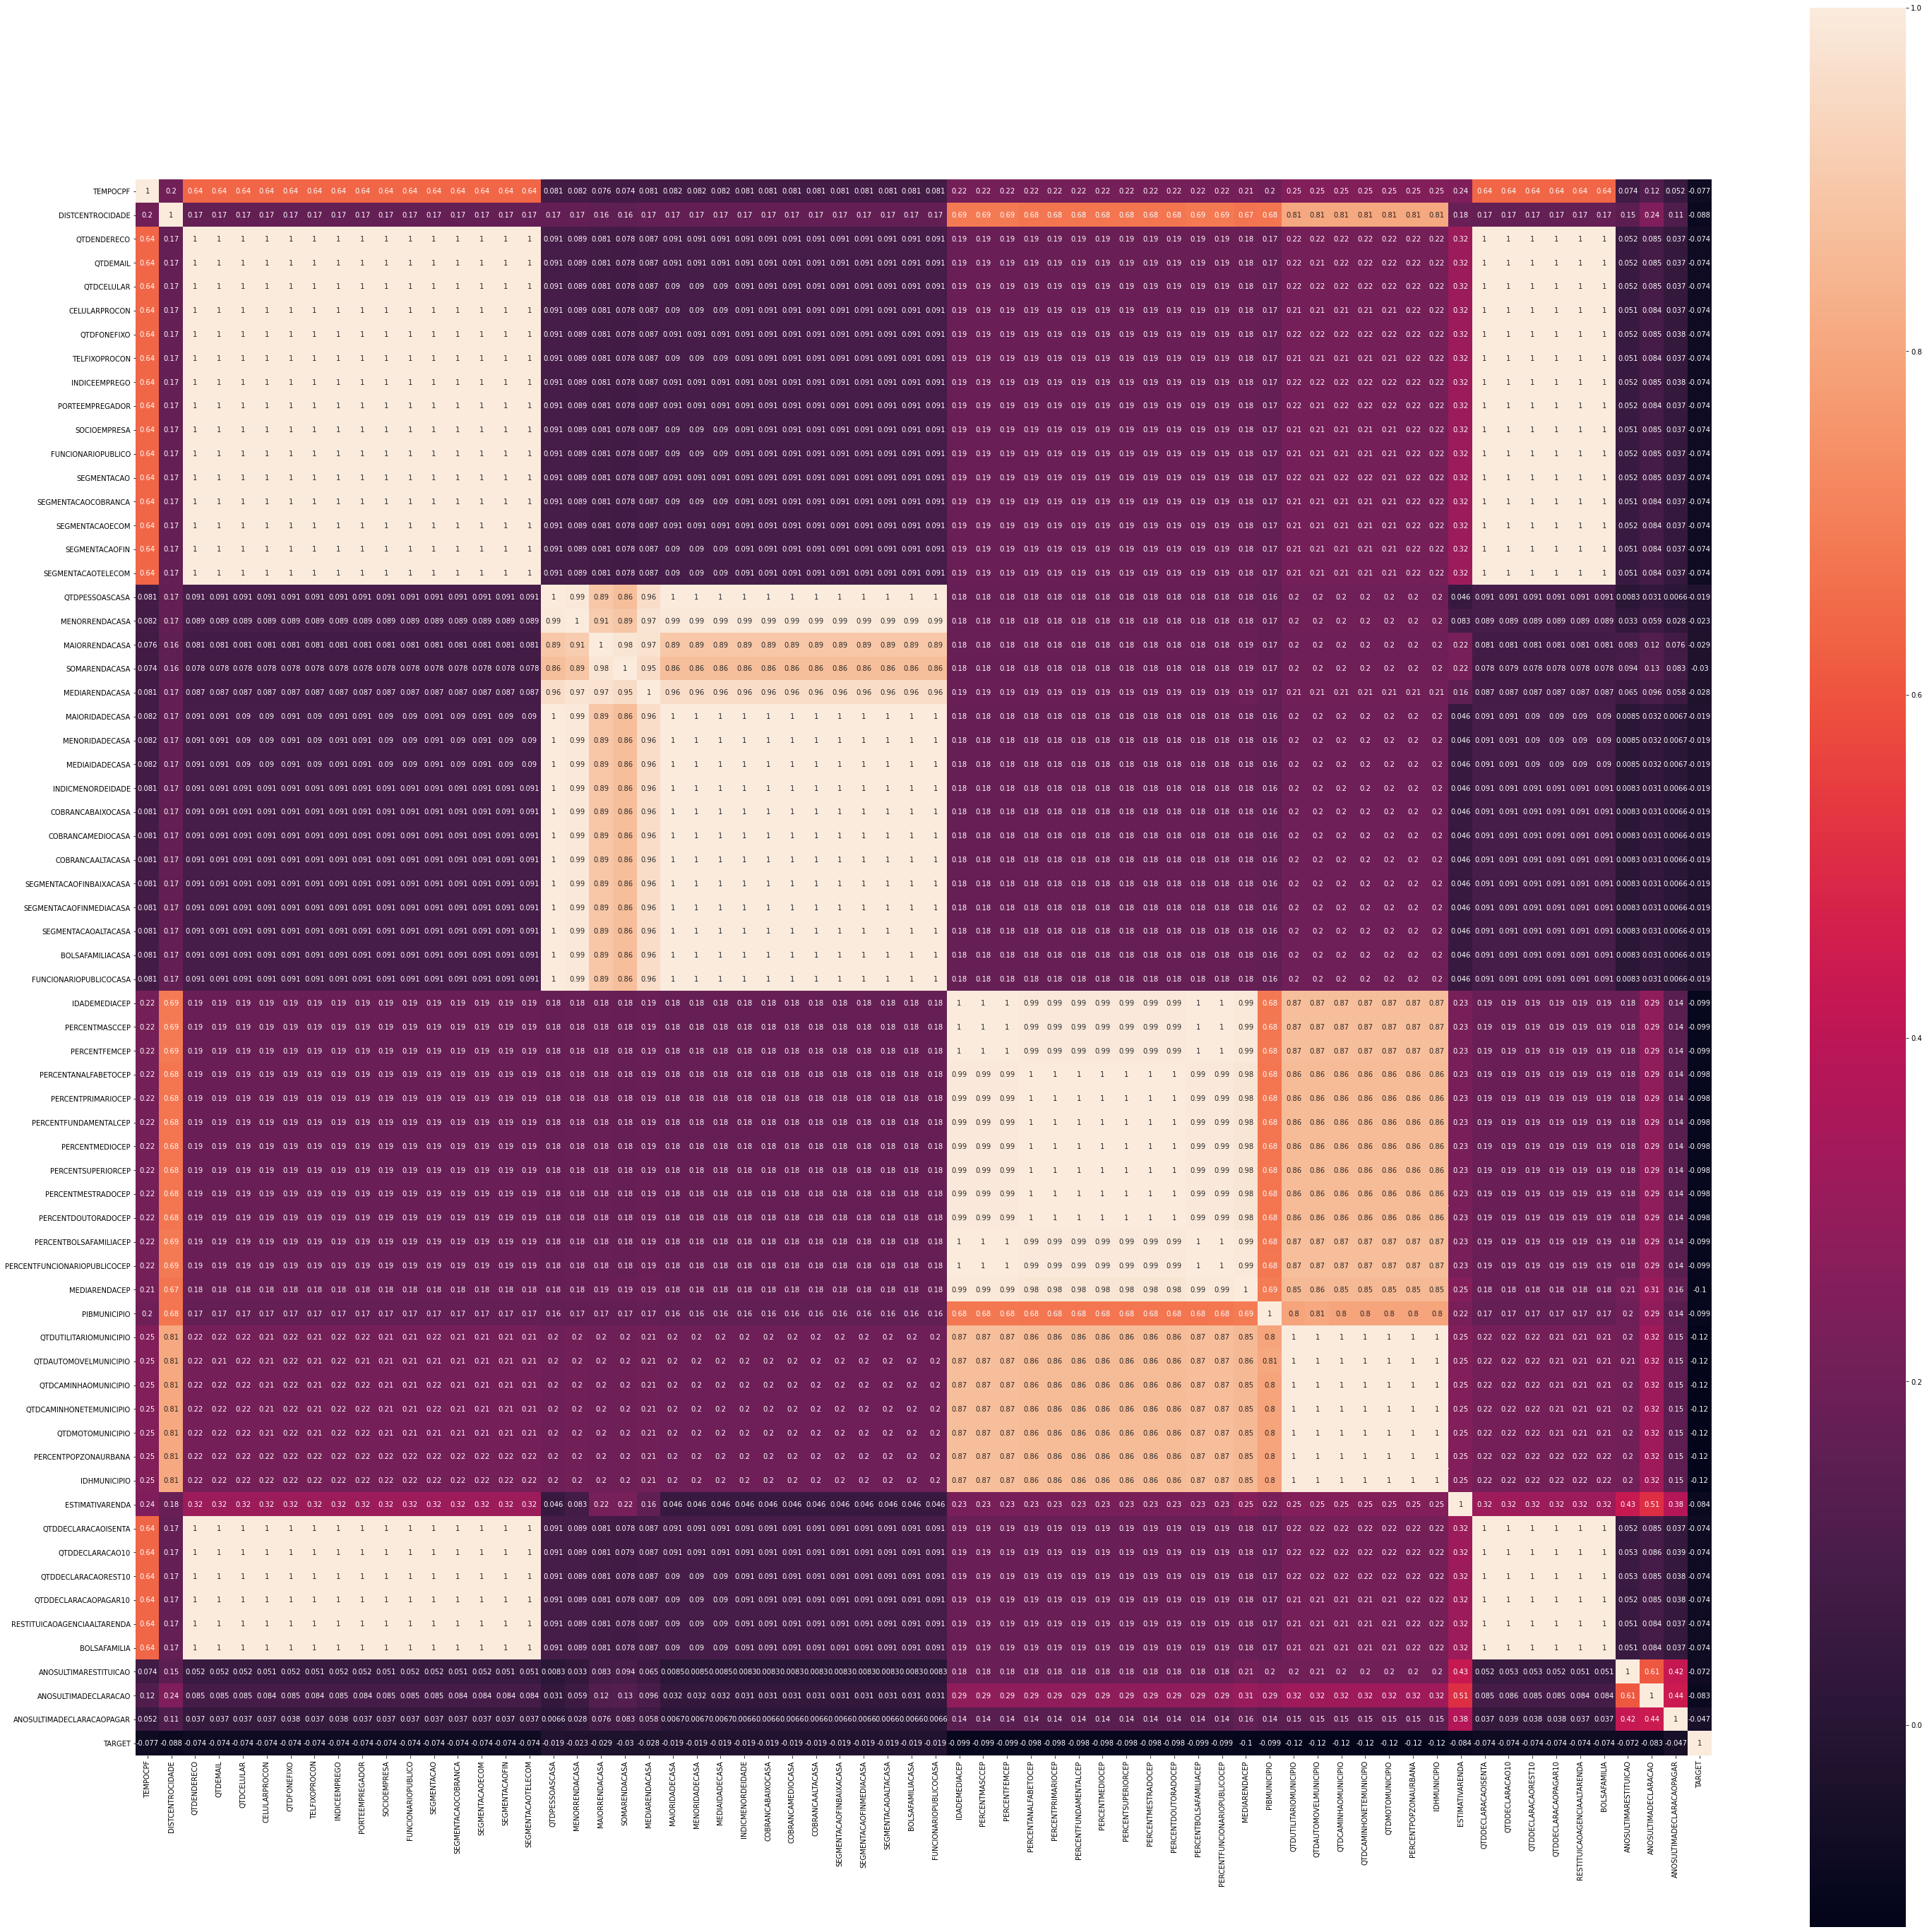

In [14]:
correlacoes = df.corr()
fig, ax = plt.subplots(figsize=(50,50))
sns.heatmap(correlacoes,square=True, annot=True)
plt.show()

In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return vif

In [35]:
#df.drop(['SEGMENTACAOALTACASA'], axis=1, inplace=True)
#df.drop(['COBRANCAALTACASA'], axis=1, inplace=True)
#df.drop(['SEGMENTACAOFINBAIXACASA'], axis=1, inplace=True)
#df.drop(['INDICMENORDEIDADE'], axis=1, inplace=True)
#df.drop(['COBRANCABAIXOCASA'], axis=1, inplace=True)
#df.drop(['SEGMENTACAOFINMEDIACASA'], axis=1, inplace=True)
#df.drop(['COBRANCAMEDIOCASA'], axis=1, inplace=True)
#df.drop(['SEGMENTACAOFIN'], axis=1, inplace=True)
df.drop(['CELULARPROCON'], axis=1, inplace=True)

In [36]:
calc_vif(df.fillna(df.mean())).sort_values("VIF", ascending=False)

,variables,VIF
23,BOLSAFAMILIACASA,7.671764e+08
24,FUNCIONARIOPUBLICOCASA,6.424058e+08
34,PERCENTDOUTORADOCEP,5.747572e+08
33,PERCENTMESTRADOCEP,4.817987e+08
15,QTDPESSOASCASA,3.005090e+08
51,RESTITUICAOAGENCIAALTARENDA,1.640776e+08
28,PERCENTANALFABETOCEP,1.592986e+08
6,TELFIXOPROCON,1.041901e+08
52,BOLSAFAMILIA,3.569034e+07
22,MEDIAIDADECASA,3.189906e+07
